In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras


Populating the interactive namespace from numpy and matplotlib


C:\Users\paarthiv\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Let’s set a seed value, so that we can control our models randomness
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
train=pd.read_csv("train.csv")

In [4]:
test=pd.read_csv("test.csv")

In [11]:
img_name = rng.choice(train.filename)
filepath = os.path.join( 'train', img_name)

In [12]:
img_name

'30181.png'

In [13]:
filepath = os.path.join( 'Images', 'train', img_name)

In [14]:
filepath

'Images\\train\\30181.png'

In [15]:
img = imread(filepath, flatten=True)

C:\Users\paarthiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


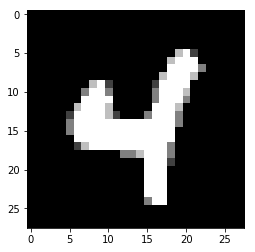

In [16]:
pylab.imshow(img, cmap='gray')

In [17]:
train.head()

filename  label
0    0.png      4
1    1.png      9
2    2.png      1
3    3.png      7
4    4.png      3

In [18]:
test.head()

filename
0  49000.png
1  49001.png
2  49002.png
3  49003.png
4  49004.png

In [20]:
temp = []
for img_name in train.filename:
    image_path = os.path.join( 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)

C:\Users\paarthiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [27]:
train_x = np.stack(temp)

In [25]:
temp

[array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          26., 143.,  96.,   0.,   0.,   0.],
        [  0.,   0.,

In [28]:
train_x.shape

(49000, 28, 28)

In [29]:
train_x /= 255.0

In [31]:
train_x1 = train_x.reshape(-1, 784).astype('float32')

In [32]:
train_x1.shape

(49000, 784)

In [33]:
temp = []
for img_name in test.filename:
    image_path = os.path.join( 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)

C:\Users\paarthiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [34]:
test_x = np.stack(temp)

In [36]:
test_x /= 255.0

In [37]:
test_x = test_x.reshape(-1, 784).astype('float32')

In [38]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [39]:
split_size = int(train_x.shape[0]*0.7)


In [40]:
train_x, val_x = train_x[:split_size], train_x[split_size:]

In [41]:
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [42]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

In [43]:
epochs = 5
batch_size = 128


In [44]:
# import keras modules

from keras.models import Sequential
from keras.layers import Dense

In [45]:
# create model
model = Sequential([
  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

C:\Users\paarthiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\paarthiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
  after removing the cwd from sys.path.


In [46]:
# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

C:\Users\paarthiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 4s 103us/step - loss: 0.5931 - acc: 0.8411 - val_loss: 0.3115 - val_acc: 0.9150
Epoch 2/5
34300/34300 [==============================] - 1s 38us/step - loss: 0.2576 - acc: 0.9280 - val_loss: 0.2450 - val_acc: 0.9307
Epoch 3/5
34300/34300 [==============================] - 1s 37us/step - loss: 0.2054 - acc: 0.9418 - val_loss: 0.2086 - val_acc: 0.9405
Epoch 4/5
34300/34300 [==============================] - 1s 39us/step - loss: 0.1723 - acc: 0.9510 - val_loss: 0.1863 - val_acc: 0.9466
Epoch 5/5
34300/34300 [==============================] - 1s 39us/step - loss: 0.1473 - acc: 0.9583 - val_loss: 0.1697 - val_acc: 0.9512


In [48]:
pred = model.predict_classes(test_x)

In [49]:
img_name = random.choice(test.filename)

In [50]:
img = imread(filepath, flatten=True)

C:\Users\paarthiv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [51]:
test_index = int(img_name.split('.')[0]) - train.shape[0]

In [52]:
print ("Prediction is: ", pred[test_index])

Prediction is:  8


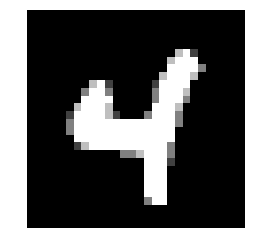

In [53]:
pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()
